In [ ]:
# Load in data from eirgrid_data folder xlsx files
# iterate through the eirgrid_data folder and if it is a xlsx file load it in and print shape of the dataframe


import os 
import pandas as pd
import numpy
dataframes = []
for file in os.listdir('eirgrid_data/raw'):
    if file[-5:] == '.xlsx':
        df = pd.read_excel(f'eirgrid_data/raw/{file}')
        
        # select only the columns up to SNSP column
        df = df.loc[:, :'SNSP']

        print(file, df.shape)

        dataframes.append((df, file, df.shape))





System-Data-Qtr-Hourly-2014-2015.xlsx (70080, 13)
System-Data-Qtr-Hourly-2016-2017.xlsx (70176, 13)
System-Data-Qtr-Hourly-2018-2019.xlsx (70080, 15)
System_Data_Qtr_Hourly_2024.xlsx (35136, 37)
System-Data-Qtr-Hourly-2022-2023_0.xlsx (70080, 37)
System-Data-Qtr-Hourly-2020-2021.xlsx (70176, 15)
System_Data_Qtr_Hourly_2025_1.xlsx (20348, 37)


In [27]:
24 * 366 * 4

35136

In [32]:

year_sorted_dfs = []
for df_tuple in dataframes:
    df, file, shape = df_tuple

    # removing information columns at the end
    df = df.loc[:, :'SNSP']
    
    # splitting each data frame into their years
    if shape[0] > 35136:
        years = df['DateTime'].dt.year.unique()
        print(file, years)

        if df['DateTime'].dt.year.iloc[35040] != df['DateTime'].dt.year.iloc[35040 - 1]:
            split = 35040
        elif df['DateTime'].dt.year.iloc[35136] != df['DateTime'].dt.year.iloc[35136 - 1]:
            split = 35136
        else:
            print('split not found')
        # splitting the dataframe at this indice and appending it to year_sorted_dfs
        first_year_df = df.iloc[:split,:]
        second_year_df = df.iloc[split:,:]
        year_sorted_dfs.append((first_year_df, years[0], first_year_df.shape))
        year_sorted_dfs.append((second_year_df, years[1], second_year_df.shape))

            # print(year, year_df.shape)
    else:
        years = df['DateTime'].dt.year.unique()
        year_sorted_dfs.append((df, years[0], shape))



System-Data-Qtr-Hourly-2014-2015.xlsx [2014 2015]
System-Data-Qtr-Hourly-2016-2017.xlsx [2016 2017]
System-Data-Qtr-Hourly-2018-2019.xlsx [2018 2019]
System-Data-Qtr-Hourly-2022-2023_0.xlsx [2022 2023]
System-Data-Qtr-Hourly-2020-2021.xlsx [2020 2021]


In [36]:
for df_tuple in year_sorted_dfs:
    df, year, shape = df_tuple
    print(year, shape)
    df.to_csv(f'eirgrid_data/cleaned/{year}.csv', index=False)


2014 (35040, 11)
2015 (35040, 11)
2016 (35136, 11)
2017 (35040, 11)
2018 (35040, 13)
2019 (35040, 13)
2024 (35136, 37)
2022 (35040, 34)
2023 (35040, 34)
2020 (35136, 13)
2021 (35040, 13)
2025 (20348, 37)


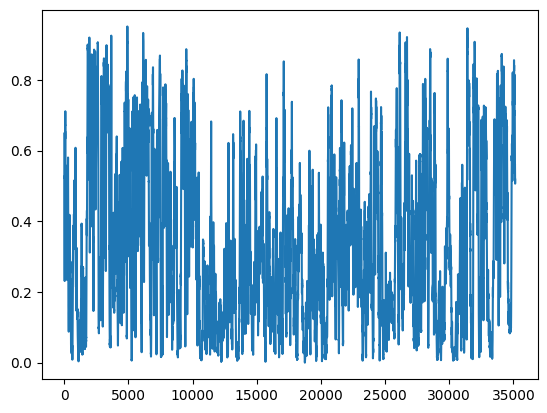